In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

# Training Set 2

In [44]:
burn_lc = pd.read_csv('../results/19jul2018/trainset_2_fissact_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../results/19jul2018/trainset_2_fissact_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../results/19jul2018/trainset_2_fissact_cooling_learning_curve.csv')
rxtr_lc = pd.read_csv('../results/19jul2018/trainset_2_fissact_reactor_learning_curve.csv')

In [45]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [30]:
burn_lc.sample(10)

,TrainSizeFrac,AbsTrainSize,TrainScore,CV-Score,Algorithm,Parameter
12,0.90,8332,1.000000,1.000000,knn,Burnup [MWd/MTU]
7,0.65,6017,1.000000,0.999997,knn,Burnup [MWd/MTU]
5,0.55,5091,1.000000,0.999997,knn,Burnup [MWd/MTU]
30,0.10,925,0.943926,0.945077,svr,Burnup [MWd/MTU]
14,1.00,9258,1.000000,1.000000,knn,Burnup [MWd/MTU]
16,0.20,1851,1.000000,1.000000,rr,Burnup [MWd/MTU]
3,0.40,3703,1.000000,0.999990,knn,Burnup [MWd/MTU]
32,0.30,2777,0.989990,0.989520,svr,Burnup [MWd/MTU]
24,0.75,6943,1.000000,1.000000,rr,Burnup [MWd/MTU]
21,0.60,5554,1.000000,1.000000,rr,Burnup [MWd/MTU]


## kNN

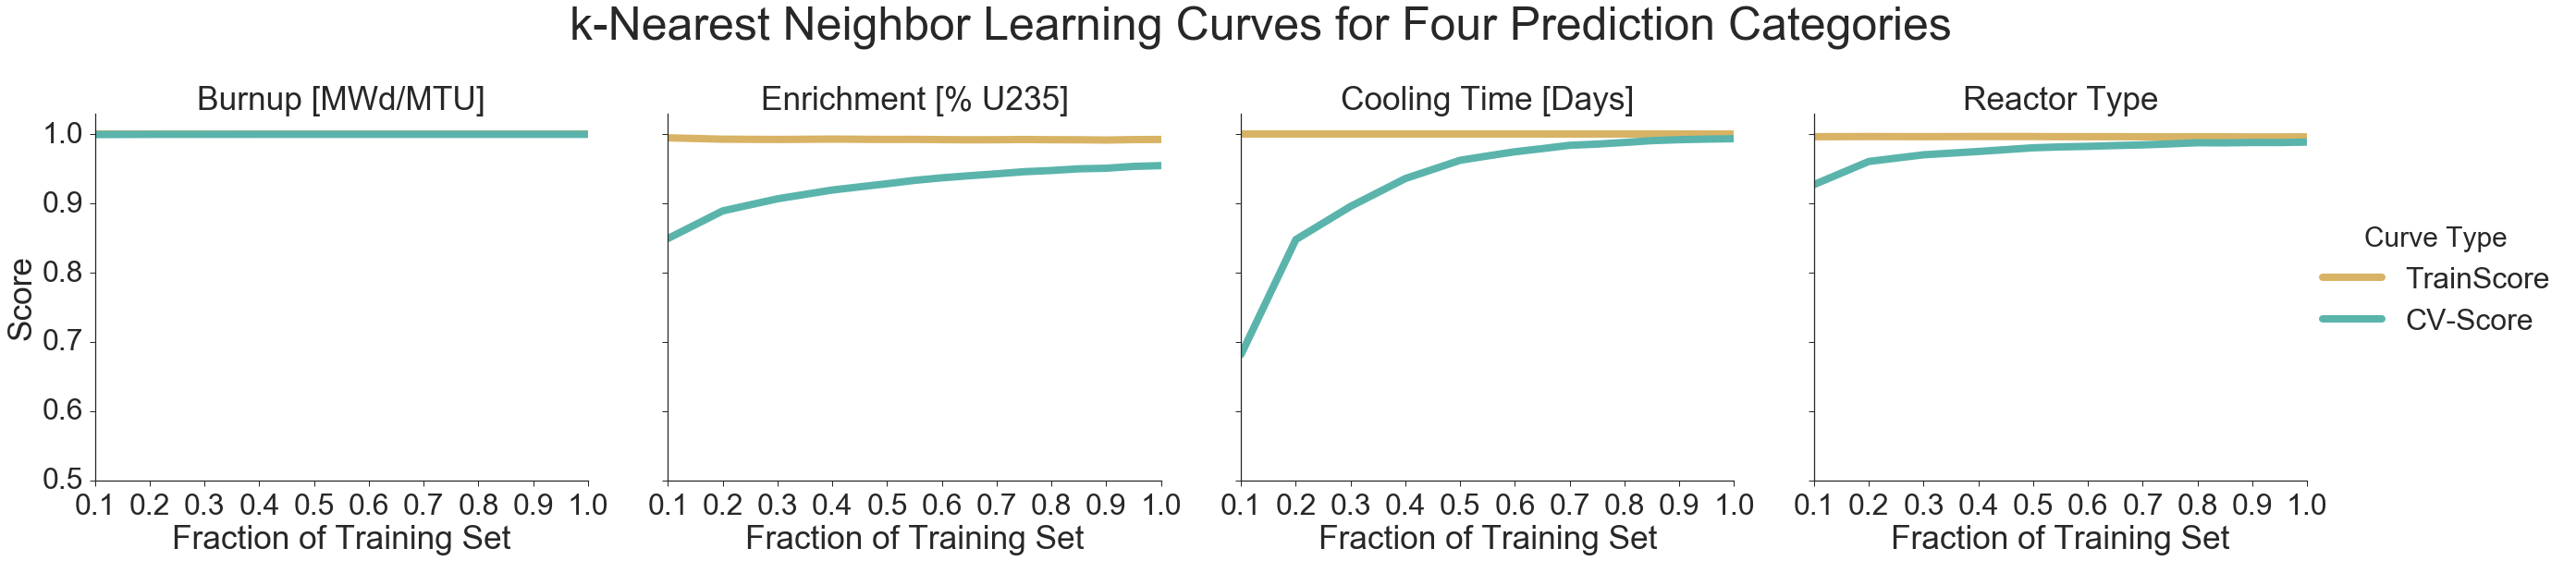

In [31]:
knn_b = burn_lc.loc[(burn_lc['Algorithm']=='knn')]
knn_e = enri_lc.loc[(enri_lc['Algorithm']=='knn')]
knn_c = cool_lc.loc[(cool_lc['Algorithm']=='knn')]
knn_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='knn')]

plt.clf()
sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.5, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('k-Nearest Neighbor Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/22jul2018/graphs/2knn_fissact_learning.png', bbox_inches='tight', transparent=True)

## Ridge

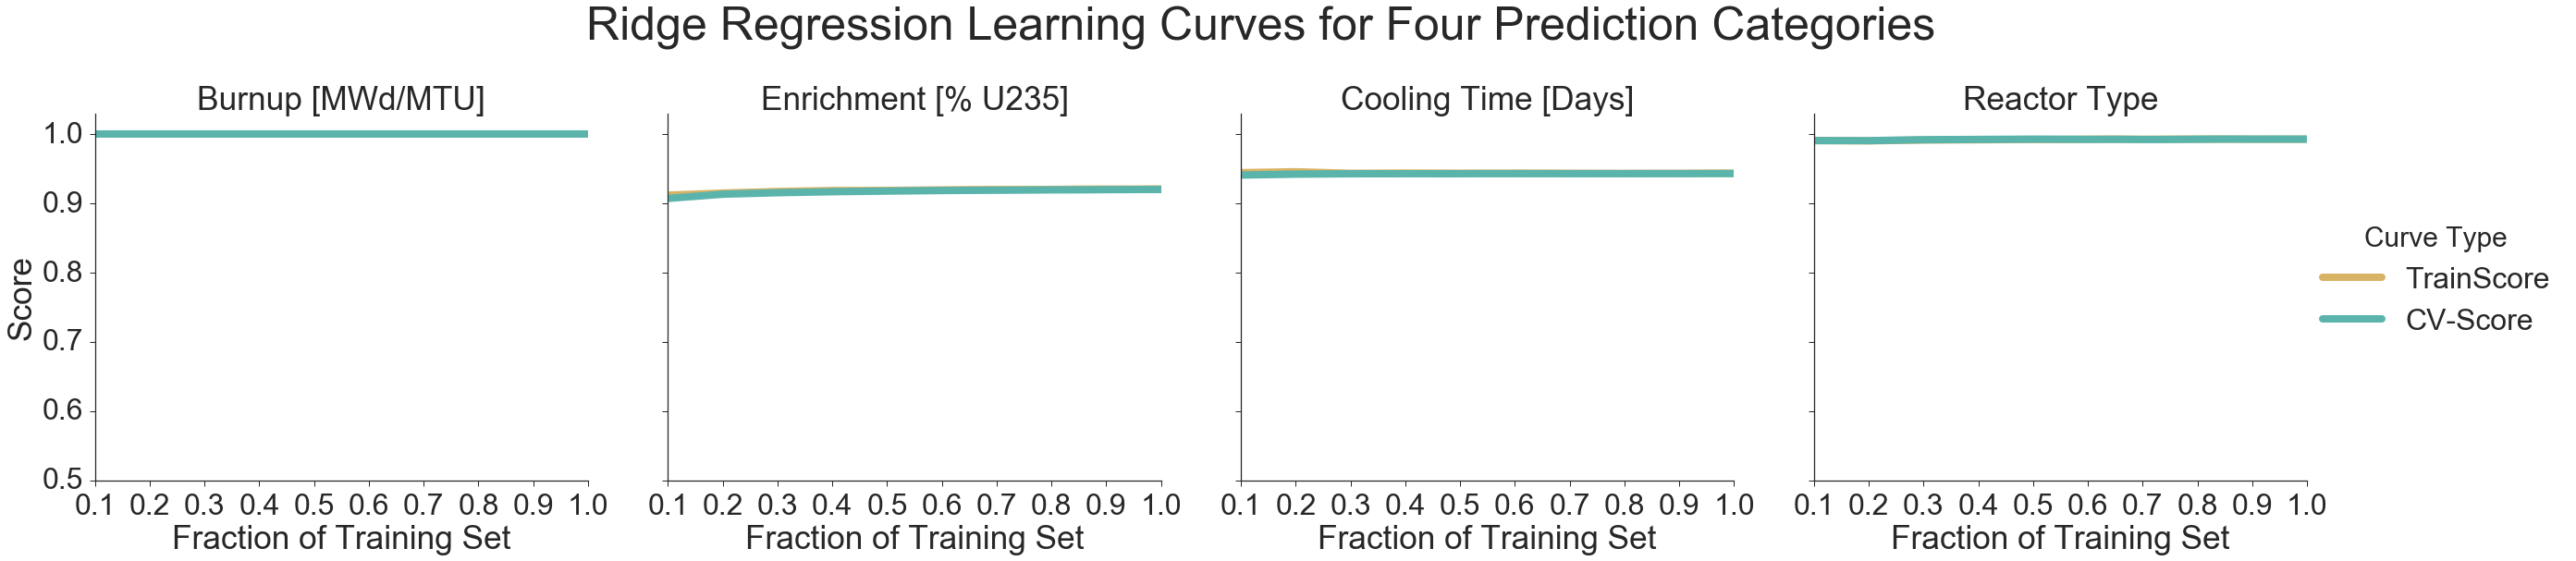

In [32]:
rr_b = burn_lc.loc[(burn_lc['Algorithm']=='rr')]
rr_e = enri_lc.loc[(enri_lc['Algorithm']=='rr')]
rr_c = cool_lc.loc[(cool_lc['Algorithm']=='rr')]
rr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='rr')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.5, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Regression Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/22jul2018/graphs/2rr_fissact_learning.png', bbox_inches='tight', transparent=True)

## SVR

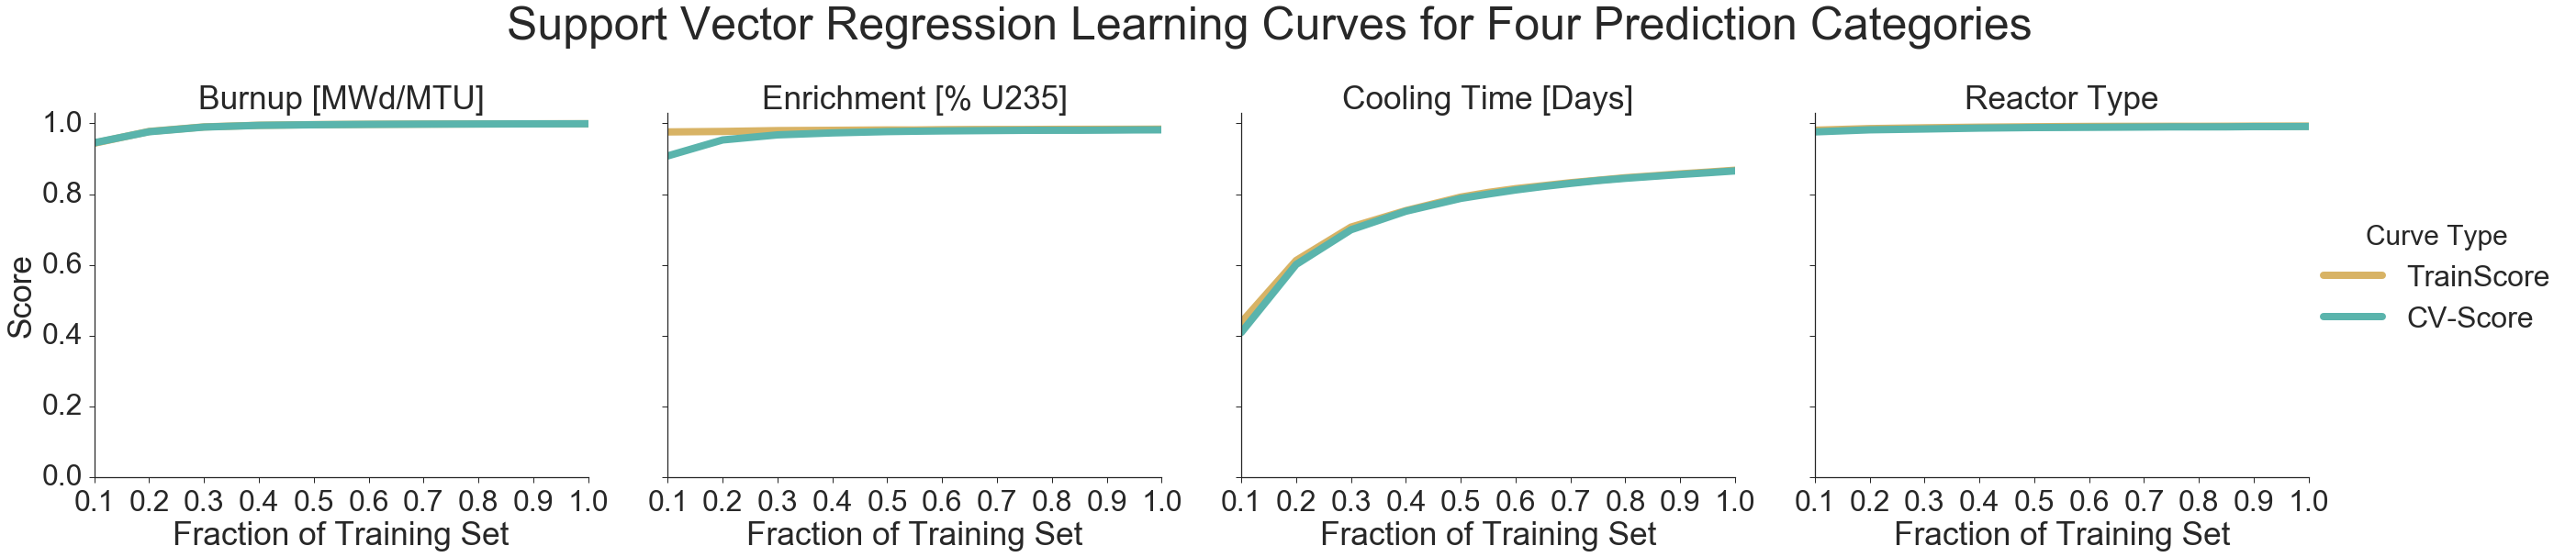

In [46]:
svr_b = burn_lc.loc[(burn_lc['Algorithm']=='svr')]
svr_e = enri_lc.loc[(enri_lc['Algorithm']=='svr')]
svr_c = cool_lc.loc[(cool_lc['Algorithm']=='svr')]
svr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='svr')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Support Vector Regression Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/22jul2018/graphs/2svr_fissact_learning.png', bbox_inches='tight', transparent=True)

# Training Set 3

In [5]:
burn_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_cooling_learning_curve.csv')
#rxtr_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_reactor_learning_curve.csv')

#burn_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_learning_curve.csv')
#enri_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_learning_curve.csv')
#cool_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_learning_curve.csv')
#rxtr_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_learning_curve.csv')
rxtr_lc = pd.read_csv('../trainset3_fissact_m60_reactor_learning_curve.csv')

In [6]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [7]:
rxtr_lc.sample(10)

,TrainSizeFrac,AbsTrainSize,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter
5,0.55,6545,0.997555,0.000572,0.952947,0.004902,knn,Reactor Type
14,1.00,11901,0.997916,0.000134,0.967399,0.002077,knn,Reactor Type
27,0.90,10710,0.998095,0.000163,0.985414,0.001998,dtree,Reactor Type
6,0.60,7140,0.997619,0.000376,0.955501,0.005170,knn,Reactor Type
42,0.90,10710,0.991242,0.000640,0.991261,0.002190,svr,Reactor Type
35,0.55,6545,0.990527,0.000848,0.990320,0.002099,svr,Reactor Type
40,0.80,9520,0.991050,0.001000,0.991127,0.002047,svr,Reactor Type
26,0.85,10115,0.998062,0.000413,0.985347,0.002417,dtree,Reactor Type
13,0.95,11305,0.997824,0.000144,0.966189,0.001714,knn,Reactor Type
21,0.60,7140,0.997927,0.000534,0.976004,0.005723,dtree,Reactor Type


# kNN

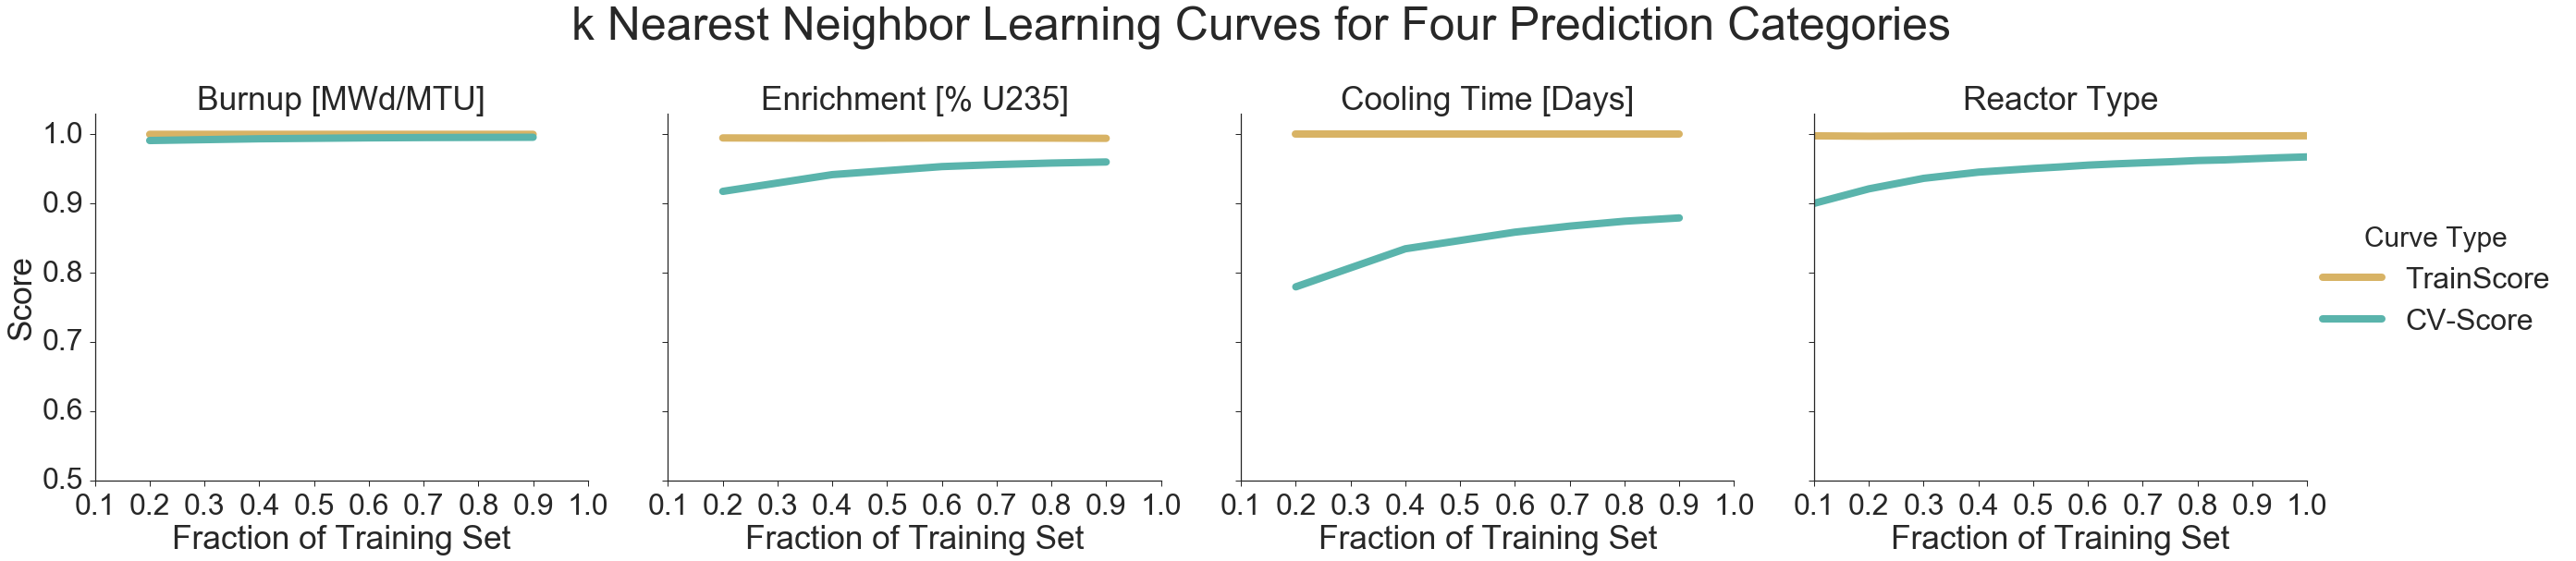

In [18]:
knn_b = burn_lc.loc[(burn_lc['Algorithm']=='knn')]
knn_e = enri_lc.loc[(enri_lc['Algorithm']=='knn')]
knn_c = cool_lc.loc[(cool_lc['Algorithm']=='knn')]
knn_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='knn')]

plt.clf()
sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.5, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('k Nearest Neighbor Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

#vc.savefig('../results/22jul2018/graphs/3knn_fissact_learning.png', bbox_inches='tight', transparent=True)

## Ridge

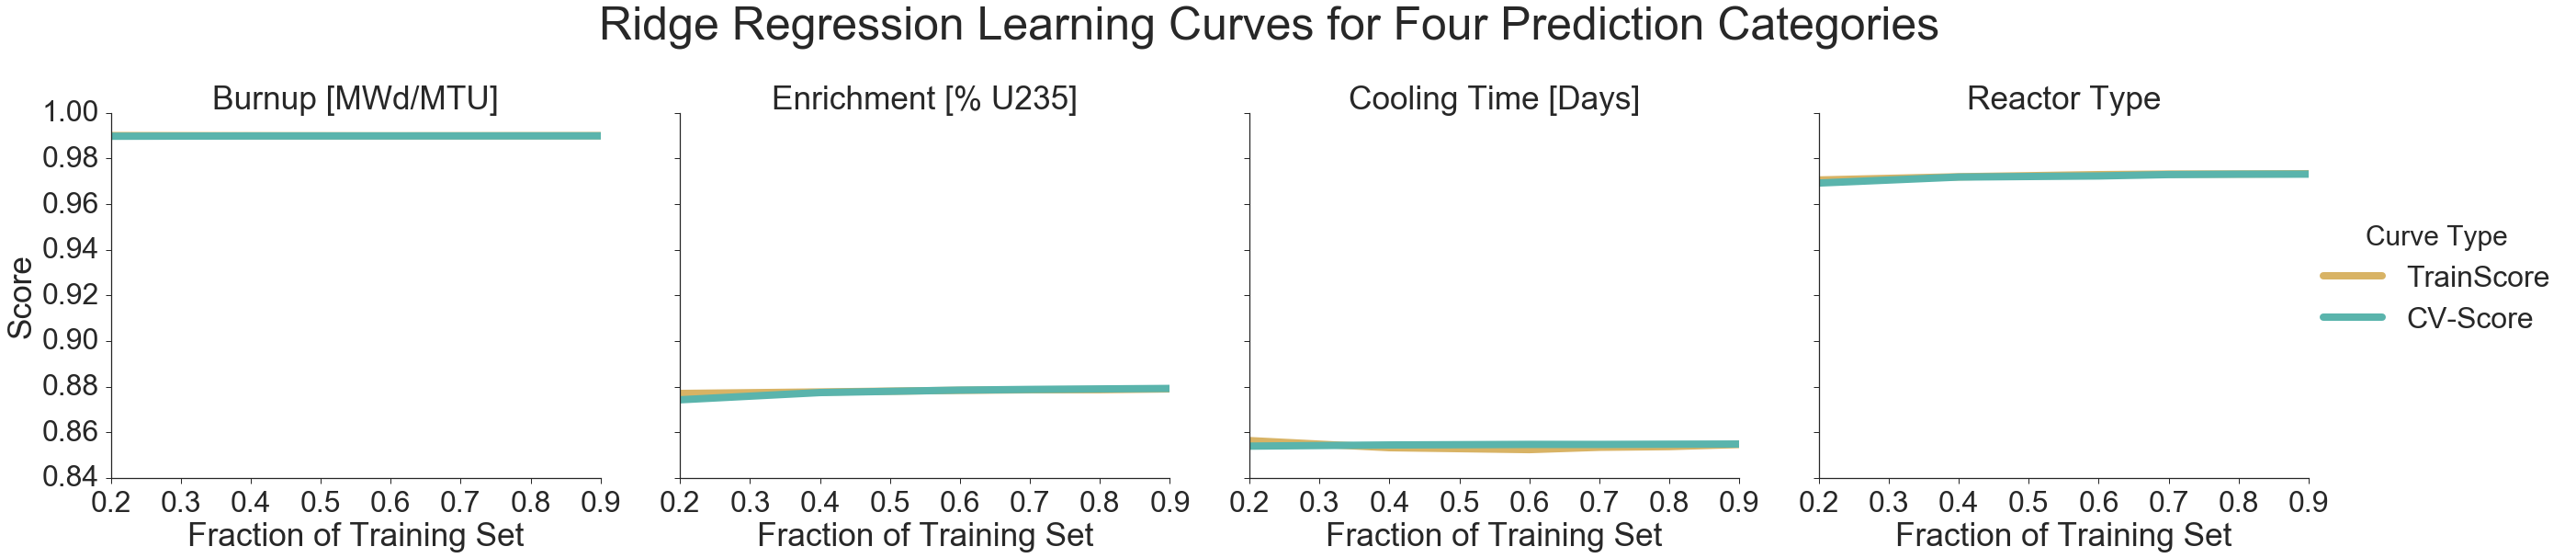

In [40]:
rr_b = burn_lc.loc[(burn_lc['Algorithm']=='rr')]
rr_e = enri_lc.loc[(enri_lc['Algorithm']=='rr')]
rr_c = cool_lc.loc[(cool_lc['Algorithm']=='rr')]
rr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='rr')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   #.set(ylim=(0.5, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Regression Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/22jul2018/graphs/3rr_fissact_learning.png', bbox_inches='tight', transparent=True)

## SVR

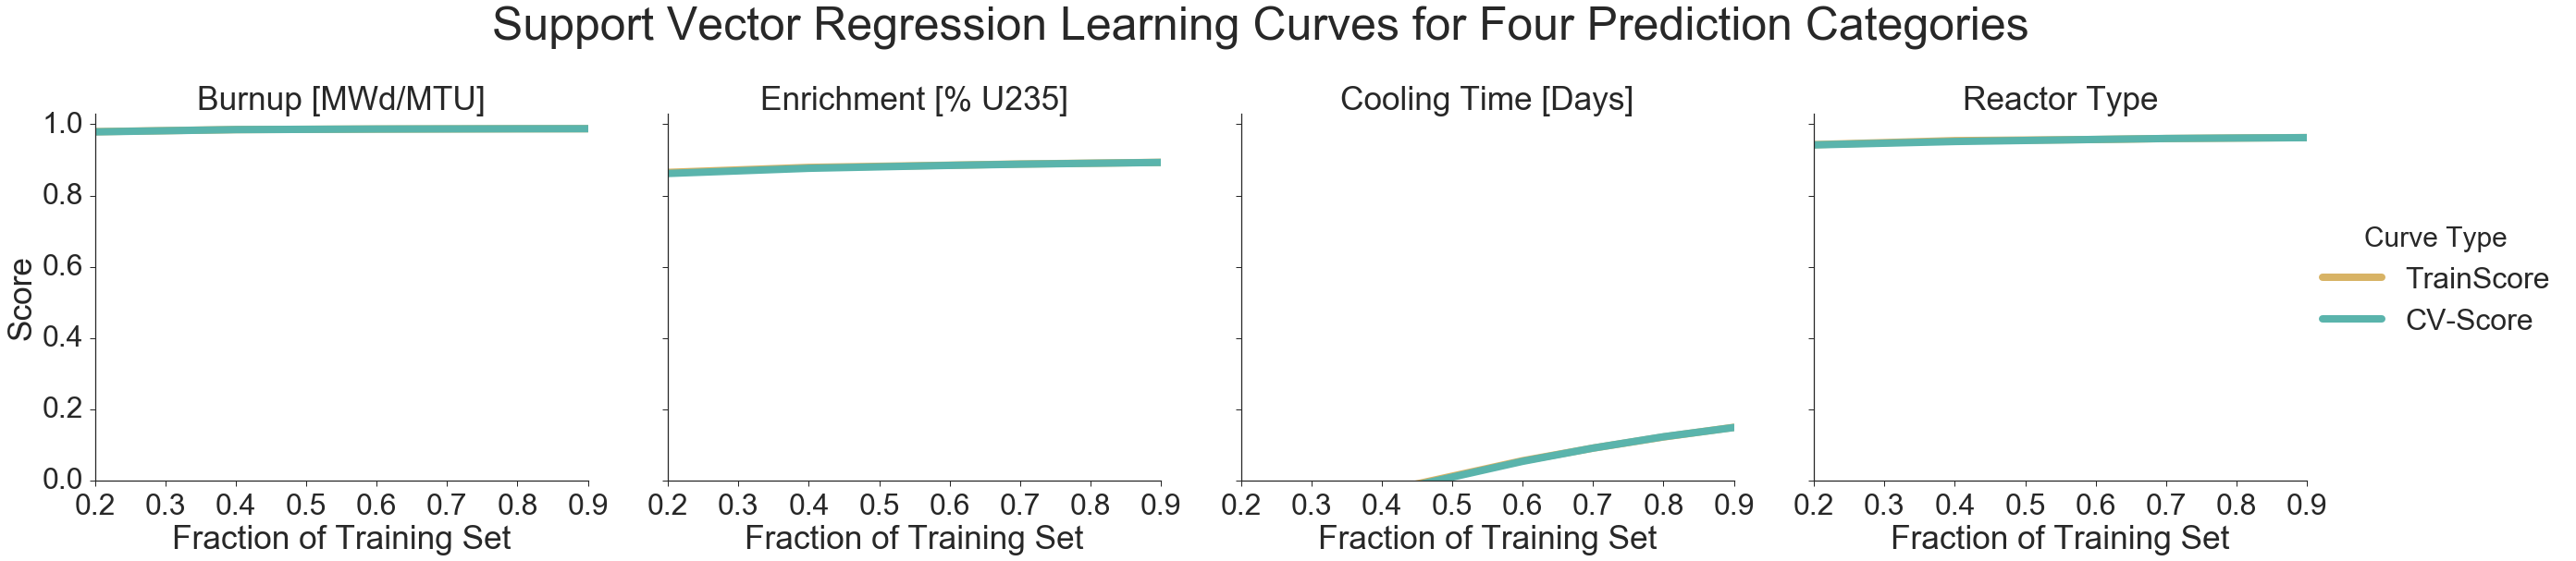

In [42]:
svr_b = burn_lc.loc[(burn_lc['Algorithm']=='svr')]
svr_e = enri_lc.loc[(enri_lc['Algorithm']=='svr')]
svr_c = cool_lc.loc[(cool_lc['Algorithm']=='svr')]
svr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='svr')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Support Vector Regression Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/22jul2018/graphs/3svr_fissact_learning.png', bbox_inches='tight', transparent=True)

# By Prediction Type

In [144]:
rxtr_lc.head(20)

,TrainSizeFrac,AbsTrainSize,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter
0,0.10,1190,0.997815,0.001365,0.900316,0.009902,knn,Reactor Type
1,0.20,2380,0.997311,0.001015,0.921221,0.004807,knn,Reactor Type
2,0.30,3570,0.997591,0.001072,0.936411,0.003867,knn,Reactor Type
3,0.40,4760,0.997563,0.000759,0.945351,0.004021,knn,Reactor Type
4,0.50,5950,0.997580,0.000568,0.950661,0.004662,knn,Reactor Type
5,0.55,6545,0.997555,0.000572,0.952947,0.004902,knn,Reactor Type
6,0.60,7140,0.997619,0.000376,0.955501,0.005170,knn,Reactor Type
7,0.65,7735,0.997647,0.000396,0.957316,0.005549,knn,Reactor Type
8,0.70,8330,0.997671,0.000327,0.958862,0.005517,knn,Reactor Type
9,0.75,8925,0.997714,0.000208,0.960341,0.005070,knn,Reactor Type


In [3]:
def plot_learning_curve(df, title, subplot, fig, ylim=None):
    
    train_sizes = df['AbsTrainSize']
    train_frac = df['TrainSizeFrac']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    ax1 = fig.add_subplot(1,3,subplot)
    
    plt.title(title, y=1.2, fontsize=18)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel("Score")
    ax1.set_xlabel('Training Set Size')
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color = med[0], 
                     alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color = med[1], 
                     alpha=0.2)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=med[0],
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=med[1],
             label="Cross-validation score")
    
    # Double x axis
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticklabels(train_frac)
    ax2.set_xlabel('Fraction of Training Set')
    
    return fig

In [10]:
fig.clf()
sns.set(style="ticks", font_scale=1)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


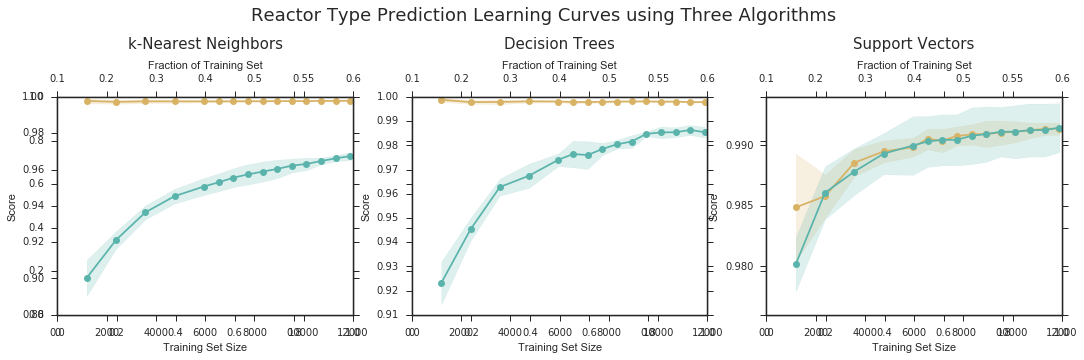

In [11]:
knn = ['knn', 'k-Nearest Neighbors']
dtree = ['dtree', 'Decision Trees']
svr = ['svr', 'Support Vectors']
subplot = 0
fig = plt.figure(figsize=(18, 5))
fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
for alg, alg_title in [knn, dtree, svr]:
    lc = rxtr_lc.loc[(rxtr_lc['Algorithm']==alg)]
    title = alg_title
    subplot = subplot+1
    plot_learning_curve(lc, title, subplot, fig)#, (0.7, 1.01))
fig.suptitle('Reactor Type Prediction Learning Curves using Three Algorithms', fontsize=24)
plt.subplots_adjust(top=.73)
plt.legend(loc=(1.1, 0.5))
fig.show()

## Reactor Type

In [46]:
df = rxtr_lc
df = df.melt(id_vars = ['TrainSizeFrac', 'AbsTrainSize', 'Algorithm'], 
             value_vars = ['TrainScore', 'CV-Score', 'TrainStd', 'CV-Std'], 
             value_name='Score', var_name='Curve Type')

In [53]:
plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = rxtr_lc
df = df.melt(id_vars = ['TrainSizeFrac', 'AbsTrainSize', 'Algorithm'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

lc = sns.FacetGrid(data=df, col='Algorithm', 
                   hue='Curve Type', style='Curve Type',
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
lc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8) #plot_learning_curve

(lc.set_axis_labels('Training Set Size', 'Score')
   #.set(ylim=(0, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Reactor Type Prediction Learning Curves using Three Algorithms', fontsize=50))
plt.subplots_adjust(top=.8)

df = rxtr_lc
train_sizes = df['AbsTrainSize']
train_scores_mean = df['TrainScore']
train_scores_std = df['TrainStd']
test_scores_mean = df['CV-Score']
test_scores_std = df['CV-Std']
#plt.grid()

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                 train_scores_mean + train_scores_std, alpha=0.1)
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                 test_scores_mean + test_scores_std, alpha=0.1)

lc.savefig('../results/4oct2018/graphs/rxtr_learning.png', bbox_inches='tight', transparent=True)

TypeError: __init__() got an unexpected keyword argument 'style'